In [22]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

### CIFAR10 Dataset Loading and Show Image
    이 코드에서는 CIFAR10 데이터셋을 로딩하는 2가지 방법에 대해서 알아본다

In [23]:
# 오픈소스 불러오기: torchvision.datasets
# 인자값(경로, Train Dataset만을 받을 거냐, 중요... 있다가 설명, 다운할래?)
# 압축도 알아서 풂
train_dataset=torchvision.datasets.CIFAR10(root='../../data/',
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True)

Files already downloaded and verified


In [29]:
# 다운받은 데이터 이미지를 실제로 출력해보자
# print(train_dataset[0])
'''
Transform 모듈
(1) Scaling
::
0~255 값이 아닌 0~1 값임을 확인할 수 있다
transform.ToTensor() 덕분 : 모든 값을 255로 나눈다 == scaling 한다
숫자가 커지면
1) 연산 속도가 느려짐
2) Overfitting 문제(극적으로 변동하기 때문에 분산값이 큼) --> 데이터 불안정
==> 무조건 해줘야 함

(2) Tensor Type으로 변형

(3) Augmentation
'''

# 이미지와 라벨 분리
image, label = train_dataset[0]
print('image : {} \n label {}' .format (image,label)) # 채널이 먼저 나옴
print('image size : {} \n image shape : {}' .format(image.shape, image.size()))

image : tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.

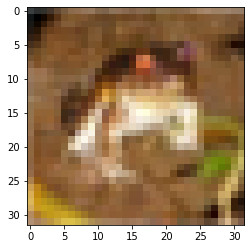

In [30]:
# Image를 이미지로 출력
image = image.numpy()
# shape에서 채널을 맨 뒤로 보내야 한다... 32 * 32 3
image = np.moveaxis(image, 0 ,-1)
plt.imshow(image)

In [37]:
# 실제 파일 불러오기
'''
위에서는 로컬로 불러들인 것

메모리 상으로 불러들이기
batch_size =n: N개 데이터를 n개 나누어 불러들인다
- 여기서는 N/n = 781.25개
- 남는 것은?
drop_last = False (기본값) : 남으면 한 번 더 돈다
'''
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                            batch_size=64,
                            shuffle=True)

cnt = 0
for images, labels in train_loader: # 782번 돈다
    # Training Code
    '''
    1. model, Loss 정의
    2. model에 param 입력(Forward)
    3. Loss 도출
    4. backward()
    5. step()
    '''
    cnt += 1
print(cnt)

782
